In [13]:
"""
From pg 139 (Schmidt, 2010) - graphically chosing parameters to satisfy sampling constraints for multiple (n-1)
partial propagations

Parameters:

delta1 - sample spacing for source screen
delta_n - sample spacing for observation screen
N - number of grid points (both source and observation)
D1 - maximum spatial extent of source
D2 - maximum spatial extent of observation screen (e.g diameter of sensor)
wvl - optical wavelength
Dz - propagation distance
R - radius of parabolic wavefront
"""

import numpy as np
import matplotlib.pyplot as plt

In [14]:
def constraint_1(D1,D2,delta1,wvl,Dz):
    
    delta_n = -(D2/D1)*delta1 + wvl*Dz/D1
    
    return delta_n

In [15]:
def constraint_2(delta1,delta_n,D1,D2,wvl,Dz):
    
    delta1_mesh,delta_n_mesh = np.meshgrid(delta1,delta_n)
    
    N = D1/(2*delta1_mesh) + D2/(2*delta_n_mesh) + wvl*Dz/(2*delta1_mesh*delta_n_mesh) 
    
    return delta1_mesh,delta_n_mesh,N

In [16]:
def constraint_3(delta1,D1,R,Dz,wvl):
    
    if (R != 'inf'): 
    
        delta_n_low = (1 + Dz/R)*delta1 - wvl*Dz/D1
        delta_n_high = (1 + Dz/R)*delta1 + wvl*Dz/D1
        
    if (R == 'inf'):
        
        delta_n_low = delta1 - wvl*Dz/D1
        delta_n_high = delta1 + wvl*Dz/D1
    
    return delta_n_low, delta_n_high

In [17]:
def constraint_4(delta1,delta_n,wvl,Dz):
    
    delta1_mesh,delta_n_mesh = np.meshgrid(delta1,delta_n)
    
    N = wvl*Dz/(delta1_mesh*delta_n_mesh)
    
    return delta1_mesh,delta_n_mesh,N

In [18]:
delta1 = np.linspace(1e-6, 600e-6,100)# generate array of possible source screen point spacings
delta_n = np.linspace(1e-6, 1200e-6,100)# generate array of possible observation screen point spacings

D1 = 2e-3 # spatial extent of source illumination lobe [m]
D2 = 6e-3 # spatial extent of image illumination lobe [m]
Dz = 2.0 # source-observation separation distance [m]
wvl = 1e-6 # optical wavelength
R = 'inf' # radius of curvature of wavefront - set to 'inf' if plane wave
#R = 0.01

In [19]:
delta_n_constraint_1 = constraint_1(D1, D2, delta1, wvl, Dz)

delta1_mesh, delta_n_mesh, N_constraint_2 = constraint_2(delta1, delta_n, D1, D2, wvl, Dz)

delta_n_constraint_3_low, delta_n_constraint_3_high = constraint_3(delta1, D1, R, Dz, wvl)

#delta1_mesh, delta_n_mesh, N_constraint_4 = constraint_4(delta1, delta_n, wvl, Dz)

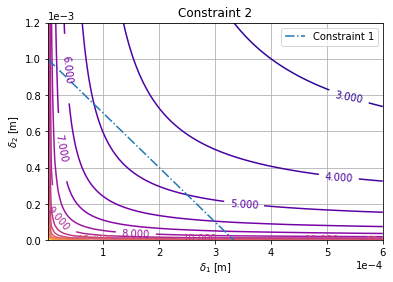

In [20]:
fig, ax = plt.subplots()

plt.plot(delta1, delta_n_constraint_1, '-.', label = 'Constraint 1')
plt.plot([6.7e-6],[133e-6])
#plt.plot(delta1, delta_n_constraint_3_low, '--', label = 'Constraint 3 Low')
#plt.plot(delta1, delta_n_constraint_3_high, '--', label = 'Constraint 3 High')

contour_constraint_3 = ax.contour( delta1_mesh, delta_n_mesh, np.log2(N_constraint_2), 20, cmap = 'plasma') #needs contour label
ax.clabel(contour_constraint_3, inline=1, fontsize=10)

#contour_constraint_4 = ax.contour( delta1_mesh, delta_n_mesh, np.log2(N_constraint_4), 10)
#ax.clabel(contour_constraint_4, inline=1, fontsize=10)

plt.ticklabel_format(style='sci', scilimits=(0,0))

plt.xlim(left = delta1[0], right = delta1[-1])
plt.ylim(bottom = delta_n[0], top = delta_n[-1])

plt.xlabel(r'$\delta_1$ [m]')
plt.ylabel(r'$\delta_2$ [m]')

plt.title('Constraint 2')
plt.grid()

plt.legend()

Examining the above plot if we want the source ($D_1 = 2 mm$) and observation ($D_2 = 6 mm$) aperature diameters to have at least 30 points across, then choosing $\delta_1 = D_1/30 = 6.7 \mu m$ and $\delta_n = D_2/30 = 133 \mu m$ is possible with
$N$ = 128 to satisfy Constraint 1 and 2.

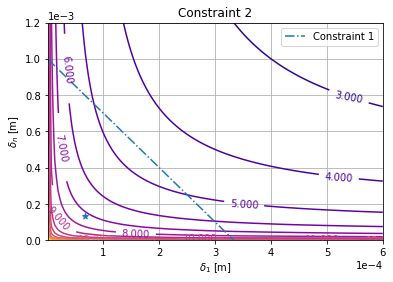

In [21]:
fig, ax = plt.subplots()

plt.plot(delta1, delta_n_constraint_1, '-.', label = 'Constraint 1')
#plt.plot(delta1, delta_n_constraint_3_low, '--', label = 'Constraint 3 Low')
#plt.plot(delta1, delta_n_constraint_3_high, '--', label = 'Constraint 3 High')

contour_constraint_3 = ax.contour( delta1_mesh, delta_n_mesh, np.log2(N_constraint_2), 20, cmap = 'plasma') #needs contour label
ax.clabel(contour_constraint_3, inline=1, fontsize=10)

#contour_constraint_4 = ax.contour( delta1_mesh, delta_n_mesh, np.log2(N_constraint_4), 10)
#ax.clabel(contour_constraint_4, inline=1, fontsize=10)

ax.scatter([66.7e-6],[133e-6], marker = "*")

plt.ticklabel_format(style='sci', scilimits=(0,0))

plt.xlim(left = delta1[0], right = delta1[-1])
plt.ylim(bottom = delta_n[0], top = delta_n[-1])

plt.xlabel(r'$\delta_1$ [m]')
plt.ylabel(r'$\delta_n$ [m]')

plt.title('Constraint 2')
plt.grid()

plt.legend()

In [22]:
def calc_min_plane_sep(delta1, delta_n, N, wvl):
    
    if (delta1 < delta_n):
        
        delta_zi = pow(delta1,2)*N/wvl
    
    if (delta_n < delta1):
        
        delta_zi = pow(delta_n,2)*N/wvl
    
    return delta_zi

In [23]:
def calc_num_partial_prop(delta_z, delta_z_max):
    
    return np.ceil(delta_z / delta_zi) + 1
    

In [24]:
delta_zi =  calc_min_plane_sep(66.7e-6, 133e-6, 2**7, wvl)
n = calc_num_partial_prop(Dz, delta_zi)

print("Maximum possible Partial-Propagation Distance [m]:", delta_zi)
print("Miniumum number of Partial-Propagation Planes [#]: ", n)

Maximum possible Partial-Propagation Distance [m]: 0.56945792
Miniumum number of Partial-Propagation Planes [#]:  5.0
